In [1]:
import pandas as pd
import numpy as np
import requests
import os
import time
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler
import json5
import re
import json

import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#image predictions, to be downloaded programmatically
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
response

df_images = pd.read_table('image-predictions/image-predictions.tsv',
                          sep='\t')
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [120]:
#query Twitter's API for additional data
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)



In [ ]:

tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# create a DataFrame

df_api = pd.read_json("tweet-json.txt", orient = 'records', lines = True)
df_api.columns
df_api.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
# create pandas DataFrame with tweet ID, retweet count, and favorite count.

df_tweet_api= df_api[['id', 'retweet_count', 'favorite_count']]
df_tweet_api.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


Assess

In [129]:

df_tweets_fakenames = df_twitter_clean[df_twitter_clean.name.str.islower() == True]
df_tweets_fakenames.name.value_counts()

a               55
the              8
an               6
very             4
one              4
just             3
quite            3
actually         2
not              2
getting          2
this             1
my               1
infuriating      1
incredibly       1
such             1
unacceptable     1
officially       1
mad              1
his              1
by               1
space            1
old              1
all              1
life             1
light            1
Name: name, dtype: int64

In [130]:
#Assess Enhanced Twitter Archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [131]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [132]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
667,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
717,783695101801398276,NaN,NaN,2016-10-05 15:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,12,10,Loomis,None,None,None,None
1082,738883359779196928,NaN,NaN,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738883359...,10,10,None,None,None,None,None
258,843604394117681152,NaN,NaN,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,None,None,None,None
648,793120401413079041,NaN,NaN,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,None,None,None,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None


In [133]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Fletcher       1
Ridley         1
Darla          1
Sojourner      1
Burt           1
Name: name, Length: 957, dtype: int64

In [134]:
df_twitter_archive.duplicated(subset='text').sum()

0

In [136]:
df_twitter_archive[df_twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [137]:
df_twitter_archive[df_twitter_archive.name.str.contains('Canela')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [138]:
df_twitter_archive[df_twitter_archive.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [139]:
df_twitter_archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [140]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [141]:

print(df_twitter_archive.doggo.value_counts())
print(df_twitter_archive.floofer.value_counts())
print(df_twitter_archive.pupper.value_counts())
print(df_twitter_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [142]:
# check for multiple stage classifications
df_twitter_archive.loc[(df_twitter_archive.doggo != 'None') & ((df_twitter_archive.floofer != 'None') | 
            (df_twitter_archive.pupper != 'None') | (df_twitter_archive.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [143]:

df_twitter_archive.name.value_counts().sort_index(ascending=False)

# wrong names: 'a', 'the', 'an', 'very', ...

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [144]:

df_tweets_fakenames = df_twitter_archive[df_twitter_archive.name.str.islower() == True]
df_tweets_fakenames.name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
actually         2
not              2
getting          2
mad              2
this             1
my               1
infuriating      1
incredibly       1
such             1
unacceptable     1
officially       1
his              1
by               1
space            1
old              1
all              1
life             1
light            1
Name: name, dtype: int64

In [145]:
len(df_twitter_archive[df_twitter_archive.name == 'None'])


745

In [146]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [147]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [148]:
# number of duplicate tweet_id
sum(df_images.tweet_id.duplicated())

0

In [149]:


# first guess not a dog type, but second guess is a dog type
second_guess = df_images[(df_images['p1_dog']==False) & (df_images['p2_dog']==True)]
second_guess

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True


In [150]:
third_guess = df_images[(df_images['p1_dog']==False) & (df_images['p2_dog']==False) & 
                          (df_images['p3_dog']==True)]
third_guess

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In [151]:
df_tweet_api.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [152]:
df_tweet_api.describe()


,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [153]:
sum(df_tweet_api.duplicated(subset='id'))

0

Quality

1-Incorrect dog names such as "None", "a", "the", "an"
2- rename id to tweet_id to match 
3-missing name should be NaN instead of string 'None'
4-timestamp should have datetime values, not strings
5-Separate timestamp into day - month - year (3 columns)
6-Source includes complete url, only need source name
7-Remove retweets (only want the original ratings) based on retweeted_status_id
8-Delete columns that won't be used for analysis
9-

Tidiness

1-Stage name should be one column because each variable forms a column('doggo', 'floofer', 'pupper', 'puppo')                                
2-Merge all dataframes into one using tweet_id
     


Clean 


In [7]:
#Copies of the original pieces of data are made prior to cleaning.
df_twitter_clean = df_twitter_archive.copy()
df_images_clean = df_images.copy()
df_tweet_api_clean = df_tweet_api.copy()

1-incorrect values for dog name ('a', 'the', 'an', 'very', ...)

In [155]:
fakenames = list(df_tweets_fakenames.name.unique())
fakenames

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [156]:
for nonname in fakenames:
    df_twitter_clean.loc[df_twitter_clean.name == nonname, 'name'] = None

In [157]:
#test
df_twitter_clean.name.value_counts()

None         745
Charlie       12
Oliver        11
Lucy          11
Cooper        11
            ... 
Fletcher       1
Ridley         1
Darla          1
Sojourner      1
Burt           1
Name: name, Length: 932, dtype: int64

2-Stage name should be one column because each variable forms a column

In [158]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2247 non-null   object 
 13  doggo                       2356 

In [159]:

# replace the 'None' with NaNs
df_twitter_clean.doggo.replace('None', np.nan, inplace=True)
df_twitter_clean.floofer.replace('None', np.nan, inplace=True)
df_twitter_clean.pupper.replace('None', np.nan, inplace=True)
df_twitter_clean.puppo.replace('None', np.nan, inplace=True)


In [160]:
# concatenate the values of the columns separated by '-'
# do not include NaNs
df_twitter_clean['stage'] = df_twitter_clean[['doggo', 'floofer', 'pupper', 
                                        'puppo']].apply(lambda x: '-'.join(x.dropna().astype(str).values), axis=1)

In [161]:

# replace empty string with NaN
df_twitter_clean.stage.replace('', np.nan, inplace=True)

In [162]:

# drop the doggo/floofer/pupper/puppo columns
df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

test

In [163]:
df_twitter_clean.stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: stage, dtype: int64

In [164]:
df_twitter_clean.columns.tolist()


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

In [165]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2247 non-null   object 
 13  stage                       380 n

3-missing name should be NaN instead of string 'None'

In [166]:
# check how many names are 'None'
len(df_twitter_clean[df_twitter_clean.name == 'None'])


745

In [167]:

# replace 'None' with None
df_twitter_clean.name.replace('None', np.nan, inplace=True)

In [168]:
# check how many names are 'None'
len(df_twitter_clean[df_twitter_clean.name == 'None'])


0

4-timestamp should have datetime values, not strings


In [12]:
#convert timestamp to datetime
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)


In [170]:
df_twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

5-Separate timestamp into day - month - year (3 columns)


In [13]:
#extract year, month and day to new columns
df_twitter_clean['year'] = df_twitter_clean['timestamp'].dt.year
df_twitter_clean['month'] = df_twitter_clean['timestamp'].dt.month
df_twitter_clean['day'] = df_twitter_clean['timestamp'].dt.day

#Finally drop timestamp column


In [193]:
#TEST
df_twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2175 non-null   int64 
 1   source                      2175 non-null   object
 2   text                        2175 non-null   object
 3   retweeted_status_timestamp  0 non-null      object
 4   rating_numerator            2175 non-null   int64 
 5   rating_denominator          2175 non-null   int64 
 6   name                        1391 non-null   object
 7   stage                       344 non-null    object
 8   year                        2175 non-null   int64 
 9   month                       2175 non-null   int64 
 10  day                         2175 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 203.9+ KB


6-Replace href tags with name of source

In [173]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [174]:
df_twitter_clean.loc[df_twitter_clean.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'Twitter for iPhone'
df_twitter_clean.loc[df_twitter_clean.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'source'] = 'Vine'
df_twitter_clean.loc[df_twitter_clean.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'Twitter Web Client'
df_twitter_clean.loc[df_twitter_clean.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'TweetDeck'

test

In [175]:
df_twitter_clean.source.value_counts()


Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

7-Remove retweets (only want the original ratings) based on retweeted_status_id

In [176]:
len(df_twitter_clean)

2356

In [177]:
sum(df_twitter_clean.retweeted_status_id.notnull())


181

In [178]:

df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.notnull()==False]

Test

In [179]:
sum(df_twitter_clean.retweeted_status_id.notnull())


0

8-Delete columns that won't be used for analysis


In [180]:
#get the column names of twitter_archive_clean
print(list(df_twitter_clean))

# Delete columns no needed
df_twitter_clean = df_twitter_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'stage', 'year', 'month', 'day']


In [181]:
#TEST
list(df_twitter_clean)

['tweet_id',
 'source',
 'text',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'year',
 'month',
 'day']

 Tidiness
1- rename id to tweet_id to match                                                           
2-Merge all dataframes into one using tweet_id



1-rename id to tweet_id to match


In [182]:
df_tweet_api_clean.sample(1)


,id,retweet_count,favorite_count
1190,717790033953034240,1272,3170


In [183]:
df_tweet_api_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']

2-Merge all dataframes into one using tweet_id

In [184]:

df_clean = pd.merge(df_twitter_clean, df_images_clean, on='tweet_id', how='inner')

In [185]:
df_clean = pd.merge(df_clean, df_tweet_api_clean, on='tweet_id', how='inner')


Test

In [186]:
df_clean[df_clean.duplicated(subset='tweet_id')]


,tweet_id,source,text,retweeted_status_timestamp,rating_numerator,rating_denominator,name,stage,year,month,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


Store the clean DataFrame

In [188]:
#Store the clean DataFrame in a CSV file
df_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

Analyze and visualize


In [189]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   source                      1994 non-null   object 
 2   text                        1994 non-null   object 
 3   retweeted_status_timestamp  0 non-null      float64
 4   rating_numerator            1994 non-null   int64  
 5   rating_denominator          1994 non-null   int64  
 6   name                        1350 non-null   object 
 7   stage                       306 non-null    object 
 8   year                        1994 non-null   int64  
 9   month                       1994 non-null   int64  
 10  day                         1994 non-null   int64  
 11  jpg_url                     1994 non-null   object 
 12  img_num                     1994 non-null   int64  
 13  p1                          1994 

In [190]:
df.sample(5)

,tweet_id,source,text,retweeted_status_timestamp,rating_numerator,rating_denominator,name,stage,year,month,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
620,765719909049503744,Twitter for iPhone,This is Brat. He has a hard time being ferocio...,NaN,12,10,Brat,NaN,2016,8,...,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True,2475,8021
341,817536400337801217,Twitter for iPhone,Say hello to Eugene &amp; Patti Melt. No matte...,NaN,12,10,Eugene,NaN,2017,1,...,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True,3505,13105
342,817423860136083457,Twitter for iPhone,This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,13,10,Ken,NaN,2017,1,...,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,17504,38260
67,877316821321428993,Twitter for iPhone,Meet Dante. At first he wasn't a fan of his ne...,NaN,13,10,Dante,NaN,2017,6,...,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True,5414,27907
965,711306686208872448,Twitter for iPhone,What hooligan sent in pictures w/out a dog in ...,NaN,3,10,NaN,NaN,2016,3,...,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True,819,3596


In [191]:
df.describe()

,tweet_id,retweeted_status_timestamp,rating_numerator,rating_denominator,year,month,day,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.994000e+03,0.0,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,7.358508e+17,NaN,12.280843,10.532096,2015.846540,7.158475,16.006520,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,6.747816e+16,NaN,41.497718,7.320710,0.698734,4.121823,8.933015,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,6.660209e+17,NaN,0.000000,2.000000,2015.000000,1.000000,1.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758475e+17,NaN,10.000000,10.000000,2015.000000,3.000000,8.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,624.750000,1982.000000
50%,7.084748e+17,NaN,11.000000,10.000000,2016.000000,7.000000,16.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,7.877873e+17,NaN,12.000000,10.000000,2016.000000,11.000000,24.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,8.924206e+17,NaN,1776.000000,170.000000,2017.000000,12.000000,31.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [233]:
print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'puppo'].mean())))

Doggo
Mean Retweet Count	7126
Mean Favorite Count	19356
Floofer
Mean Retweet Count	4969
Mean Favorite Count	13206
Pupper
Mean Retweet Count	2364
Mean Favorite Count	7198
Puppo
Mean Retweet Count	6474
Mean Favorite Count	21582


In [235]:
#Analysis of rating of dogs
df['rating_numerator'].value_counts().sort_index()

0         2
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       151
10      419
11      396
12      450
13      261
14       35
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

Top Rated Dog by WeRateDogs Twitter

In [203]:
df[df.rating_numerator == 1776].text


726    This is Atticus. He's quite simply America af....
Name: text, dtype: object


Most Retweeted and Most Favorited Tweet

In [205]:
df[df.favorite_count == 132810].text


309    Here's a super supportive puppo participating ...
Name: text, dtype: object

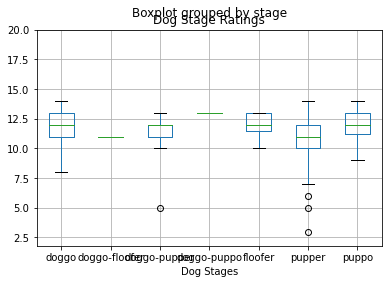

In [227]:
df[df['stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['stage'])

plt.title ('Dog Stage Ratings')
plt.xlabel('Dog Stages')
plt.ylim(ymax=20)
plt.show();

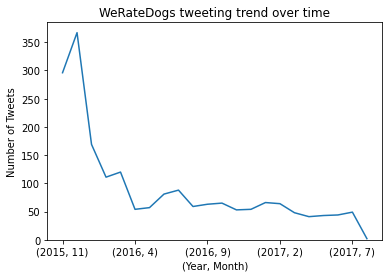

In [230]:
data = df.tweet_id.groupby([df.year, df.month]).count()
ax = data.plot(kind='line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

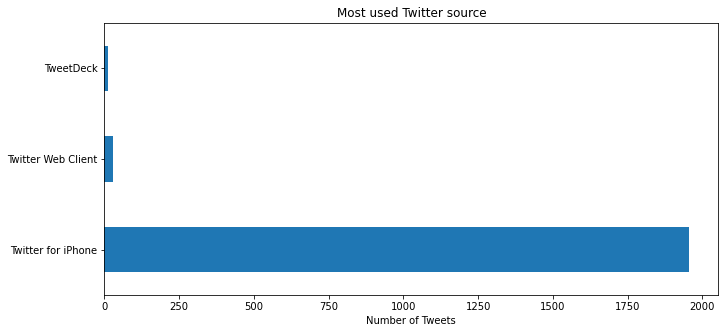

In [232]:
df['source'].value_counts().plot(kind='barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')